In [2]:
import pandas as pd
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from itertools import combinations
import os

[6666.666666666667, 10000.0, 6666.666666666667, 6666.666666666667]


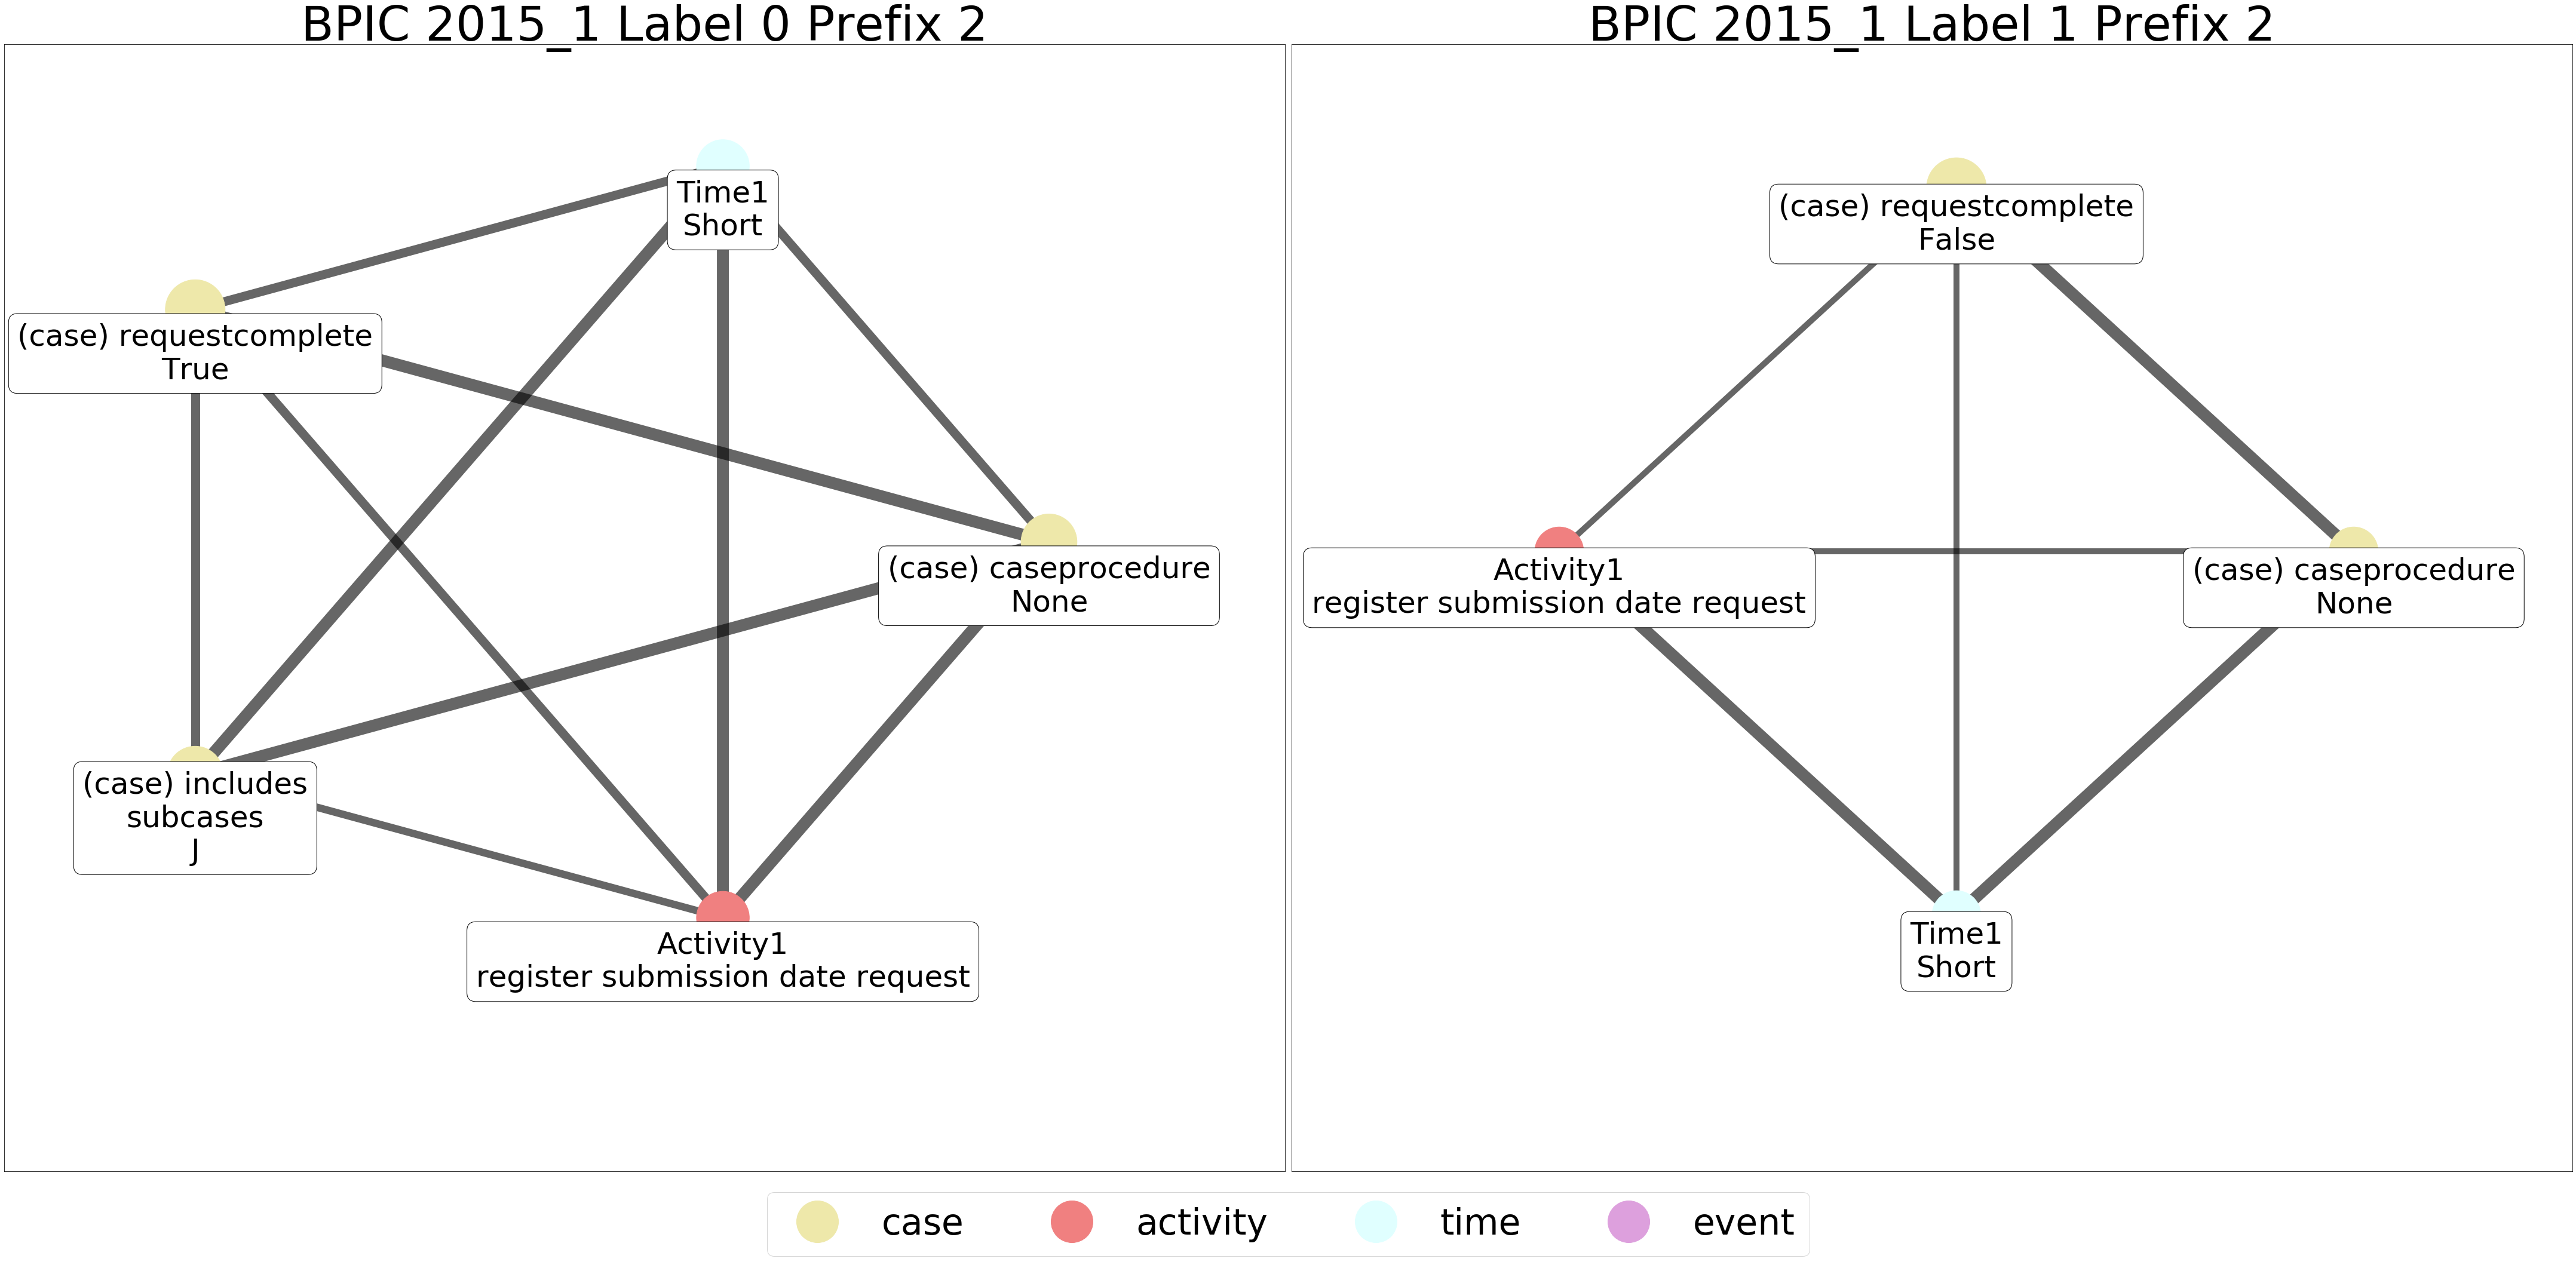

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(60,30))
ax1 = ax[0]
ax2 = ax[1]
prefix = str(2)
graph = nx.Graph()
edges = {}

nodefrequency = {}

filename = '../data/bpic2015/ltl1/bpic2015_1/ruleresult/way3/threshold0.7/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
with open(filename,'r') as f:
    data = json.load(f)

ante = []
label = 'Label 0'

title = 'BPIC 2015_1 '+label+' Prefix '+prefix 
label = 'Label_0'
# BPIC 2015
case_att = ['(case) includes_subcases', '(case) responsible_actor', '(case) SUMleges', '(case) caseprocedure',
'(case) casestatus', '(case) case_type', '(case) last_phase', '(case) parts', '(case) requestcomplete',
'(case) termname']
event_att = []
act = ['Activity']
time = ['Time']

for d in data[label]:
    for t in data[label][d]:
        ante.append(t.split('/'))

for rules in ante:
    for combis in list(combinations(rules,2)):
        combis = tuple(sorted(combis))
        if combis[0] not in list(nodefrequency.keys()):
            nodefrequency[combis[0]] =1
        else:
            nodefrequency[combis[0]] +=1

        if combis[1] not in list(nodefrequency.keys()):
            nodefrequency[combis[1]] =1
        else:
            nodefrequency[combis[1]] +=1


        if combis not in list(edges.keys()):
            edges[combis] =1
        else:
            edges[combis] +=1

edgeweight=[]
colorset ={'case':'palegoldenrod','activity':'lightcoral','time':'lightcyan','event':'plum'}
for x,y in edges.keys():
    if x.split('_')[0] in case_att or '(case)' in x.split('_')[0]:
        graph.add_node(x,color=colorset['case'],freqeuncy=nodefrequency[x])
    elif 'Activity' in x.split('_')[0]:
        graph.add_node(x,color=colorset['activity'],freqeuncy=nodefrequency[x])
    elif 'Time' in x.split('_')[0]:
        graph.add_node(x,color=colorset['time'],freqeuncy=nodefrequency[x])
    else:
        graph.add_node(x,color=colorset['event'],freqeuncy=nodefrequency[x])

    if y.split('_')[0] in case_att:
        graph.add_node(y,color=colorset['case'],freqeuncy=nodefrequency[y])
    elif 'Activity' in y.split('_')[0]:
        graph.add_node(y,color=colorset['activity'],freqeuncy=nodefrequency[y])
    elif 'Time' in y.split('_')[0]:
        graph.add_node(y,color=colorset['time'],freqeuncy=nodefrequency[y])
    else:
        graph.add_node(y,color=colorset['event'],freqeuncy=nodefrequency[y])

    graph.add_edge(x,y,weight=edges[(x,y)])
    edgeweight.append(edges[(x,y)])

edgeweight = [20*x/max(edgeweight) for x in edgeweight]
pos = nx.shell_layout(graph)
for t in pos.keys():
    pos[t] = pos[t]*0.9
# margin=0.33
# fig.subplots_adjust(margin, margin, 1.-margin, 1.-margin)
# ax.axis('equal')
node_size = [x[1] for x in graph.nodes.data('freqeuncy')]

node_size = [10000*x/max(node_size) for x in node_size]
nx.draw_networkx_nodes(graph,pos,ax=ax1,font_size=10,node_color=[x[1] for x in graph.nodes.data('color')],node_size=node_size)
nx.draw_networkx_edges(graph,pos,ax=ax1,width=edgeweight,alpha=0.6,len=0.7)
for p in pos:  # raise text positions
    pos[p][1] -= 0.1

labels ={}


for k in graph.nodes:
    labels[k] = k.replace('_','\n')
box = {
'facecolor' : '1',
'edgecolor' : 'black',
'boxstyle'  : 'round'
}
nx.draw_networkx_labels(graph, pos,ax=ax1,labels=labels,font_size=50,bbox=box)

ax1.set_title(title,fontsize=80)
fig.subplots_adjust()
cut = 1.5
xmin =cut*min(xx for xx,yy in pos.values()) 
ymin= cut*min(yy for xx,yy in pos.values())
xmax= cut*max(xx for xx,yy in pos.values())
ymax= cut*max(yy for xx,yy in pos.values())

ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)

prefix = str(2)
graph = nx.Graph()
edges = {}
nodefrequency = {}

filename = '../data/bpic2015/ltl1/bpic2015_1/ruleresult/way3/threshold0.7/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
with open(filename,'r') as f:
    data = json.load(f)

ante = []
label = 'Label 1'
title = 'BPIC 2015_1 '+label+' Prefix '+prefix 
label = 'Label_1'

# BPIC 2015
case_att = ['(case) includes_subcases', '(case) responsible_actor', '(case) SUMleges', '(case) caseprocedure',
'(case) casestatus', '(case) case_type', '(case) last_phase', '(case) parts', '(case) requestcomplete',
'(case) termname']
event_att = []
act = ['Activity']
time = ['Time']

for d in data[label]:
    for t in data[label][d]:
        ante.append(t.split('/'))

for rules in ante:
    for combis in list(combinations(rules,2)):
        combis = tuple(sorted(combis))
        if combis[0] not in list(nodefrequency.keys()):
            nodefrequency[combis[0]] =1
        else:
            nodefrequency[combis[0]] +=1

        if combis[1] not in list(nodefrequency.keys()):
            nodefrequency[combis[1]] =1
        else:
            nodefrequency[combis[1]] +=1


        if combis not in list(edges.keys()):
            edges[combis] =1
        else:
            edges[combis] +=1

edgeweight=[]
colorset ={'case':'palegoldenrod','activity':'lightcoral','time':'lightcyan','event':'plum'}
for x,y in edges.keys():
    if x.split('_')[0] in case_att:
        graph.add_node(x,color=colorset['case'],freqeuncy=nodefrequency[x])
    elif 'Activity' in x.split('_')[0]:
        graph.add_node(x,color=colorset['activity'],freqeuncy=nodefrequency[x])
    elif 'Time' in x.split('_')[0]:
        graph.add_node(x,color=colorset['time'],freqeuncy=nodefrequency[x])
    else:
        graph.add_node(x,color=colorset['event'],freqeuncy=nodefrequency[x])

    if y.split('_')[0] in case_att:
        graph.add_node(y,color=colorset['case'],freqeuncy=nodefrequency[y])
    elif 'Activity' in y.split('_')[0]:
        graph.add_node(y,color=colorset['activity'],freqeuncy=nodefrequency[y])
    elif 'Time' in y.split('_')[0]:
        graph.add_node(y,color=colorset['time'],freqeuncy=nodefrequency[y])
    else:
        graph.add_node(y,color=colorset['event'],freqeuncy=nodefrequency[y])

    graph.add_edge(x,y,weight=edges[(x,y)])
    edgeweight.append(edges[(x,y)])

edgeweight = [20*x/max(edgeweight) for x in edgeweight]
pos = nx.shell_layout(graph,scale=1)

node_size = [x[1] for x in graph.nodes.data('freqeuncy')]

node_size = [10000*x/max(node_size) for x in node_size]
print(node_size)
nx.draw_networkx_nodes(graph,pos,ax=ax2,font_size=10,node_color=[x[1] for x in graph.nodes.data('color')],node_size=node_size)
nx.draw_networkx_edges(graph,pos,ax=ax2,width=edgeweight,alpha=0.6,len=0.7)
for p in pos:  # raise text positions
    pos[p][1] -= 0.1

labels ={}


for k in graph.nodes:
    labels[k] = k.replace('_','\n')
box = {
'facecolor' : '1',
'edgecolor' : 'black',
'boxstyle'  : 'round'
}
nx.draw_networkx_labels(graph, pos,ax=ax2,labels=labels,font_size=50,with_labels = True,bbox=box)

ax2.set_title(title,fontsize=80)
fig.subplots_adjust()

cut = 1.55
xmin =cut*min(xx for xx,yy in pos.values()) 
ymin= cut*min(yy for xx,yy in pos.values())
xmax= cut*max(xx for xx,yy in pos.values())
ymax= cut*max(yy for xx,yy in pos.values())

ax2.set_xlim(xmin*1.08,xmax)
ax2.set_ylim(ymin,ymax)

colors = ["g", "w"]
texts = ["Green Data Description", "RedData Description"]
patches = [ plt.plot([],[], marker="o", ms=70, ls="", mec=None, color=colorset[i], 
            label="{:s}".format(i) )[0]  for i in colorset.keys() ]

plt.tight_layout()

# plt.legend(handles=patches, 
#            loc='upper right', fontsize=60)

plt.subplots_adjust(bottom=0.09)
fig.legend(handles=patches,
           loc="lower center",   # Position of legend
               # Small spacing around legend box
           fontsize=60,
           ncol=4
           )

plt.savefig('./bpic2015_1network.pdf')
plt.show()



10000.0
10000.0


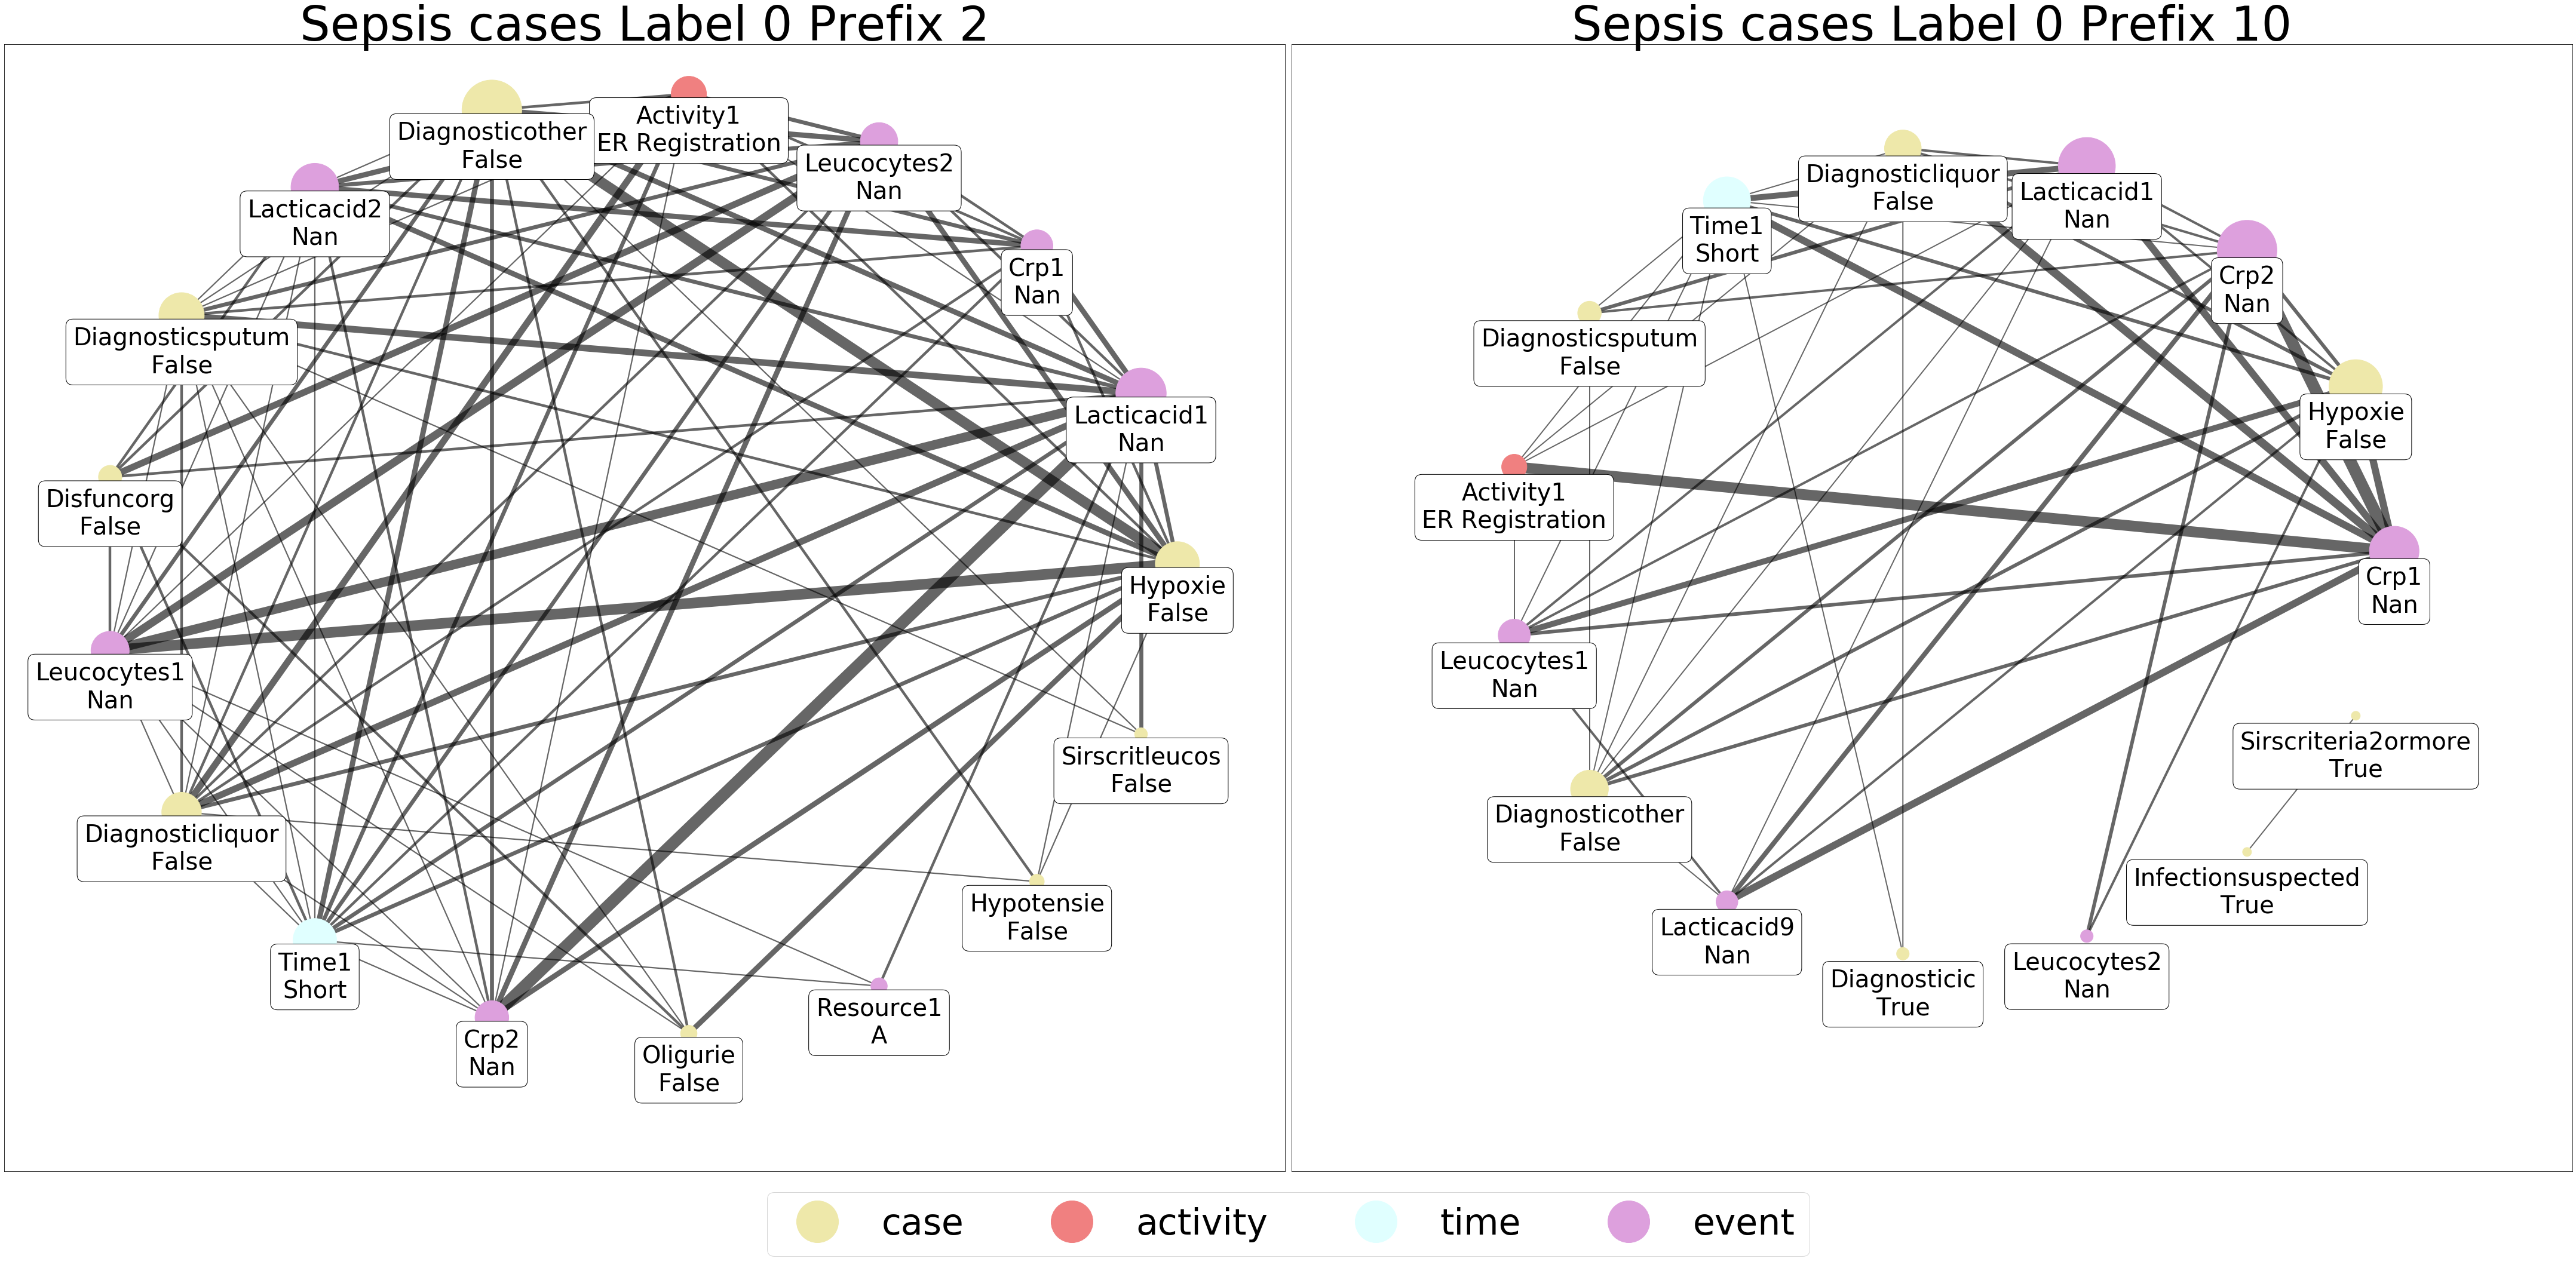

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(60,30))
ax1 = ax[0]
ax2 = ax[1]
prefix = str(2)
graph = nx.Graph()
edges = {}

nodefrequency = {}

filename = '../data/sepsis/rule1/ruleresult/way3/threshold0.9/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
with open(filename,'r') as f:
    data = json.load(f)

ante = []
label = 'Label 0'

title = 'Sepsis cases '+label+' Prefix '+prefix 
label = 'Label_0'
# Sepsis
case_att = ['Diagnose','DiagnosticArtAstrup','DiagnosticBlood','DiagnosticECG','DiagnosticIC','DiagnosticLacticAcid',
                'DiagnosticLiquor','DiagnosticOther','DiagnosticSputum','DiagnosticUrinaryCulture','DiagnosticUrinarySediment',
                'DiagnosticXthorax','DisfuncOrg','Hypotensie','Hypoxie','InfectionSuspected','Infusion','Oligurie','SIRSCritHeartRate',
                'SIRSCritLeucos','SIRSCritTachypnea','SIRSCritTemperature','SIRSCriteria2OrMore','Age']
case_att = [x.capitalize() for x in case_att]
event_att = ['Resource','CRP','LacticAcid','Leucocytes']
event_att = [x.capitalize() for x in event_att]
act = ['Activity']

for d in data[label]:
    for t in data[label][d]:
        ante.append(t.split('/'))

for rules in ante:
    for combis in list(combinations(rules,2)):
        combis = tuple(sorted(combis))
        if combis[0] not in list(nodefrequency.keys()):
            nodefrequency[combis[0]] =1
        else:
            nodefrequency[combis[0]] +=1

        if combis[1] not in list(nodefrequency.keys()):
            nodefrequency[combis[1]] =1
        else:
            nodefrequency[combis[1]] +=1


        if combis not in list(edges.keys()):
            edges[combis] =1
        else:
            edges[combis] +=1

edgeweight=[]
colorset ={'case':'palegoldenrod','activity':'lightcoral','time':'lightcyan','event':'plum'}
for x,y in edges.keys():
    if x.split('_')[0] in case_att or '(case)' in x.split('_')[0]:
        graph.add_node(x,color=colorset['case'],freqeuncy=nodefrequency[x])
    elif 'Activity' in x.split('_')[0]:
        graph.add_node(x,color=colorset['activity'],freqeuncy=nodefrequency[x])
    elif 'Time' in x.split('_')[0]:
        graph.add_node(x,color=colorset['time'],freqeuncy=nodefrequency[x])
    else:
        graph.add_node(x,color=colorset['event'],freqeuncy=nodefrequency[x])

    if y.split('_')[0] in case_att:
        graph.add_node(y,color=colorset['case'],freqeuncy=nodefrequency[y])
    elif 'Activity' in y.split('_')[0]:
        graph.add_node(y,color=colorset['activity'],freqeuncy=nodefrequency[y])
    elif 'Time' in y.split('_')[0]:
        graph.add_node(y,color=colorset['time'],freqeuncy=nodefrequency[y])
    else:
        graph.add_node(y,color=colorset['event'],freqeuncy=nodefrequency[y])

    graph.add_edge(x,y,weight=edges[(x,y)])
    edgeweight.append(edges[(x,y)])

edgeweight = [20*x/max(edgeweight) for x in edgeweight]
pos = nx.shell_layout(graph)
for t in pos.keys():
    pos[t] = pos[t]*0.9
# margin=0.33
# fig.subplots_adjust(margin, margin, 1.-margin, 1.-margin)
# ax.axis('equal')
node_size = [x[1] for x in graph.nodes.data('freqeuncy')]

node_size = [10000*x/max(node_size) for x in node_size]
print(max(node_size))
nx.draw_networkx_nodes(graph,pos,ax=ax1,font_size=10,node_color=[x[1] for x in graph.nodes.data('color')],node_size=node_size)
nx.draw_networkx_edges(graph,pos,ax=ax1,width=edgeweight,alpha=0.6,len=0.7)
for p in pos:  # raise text positions
    pos[p][1] -= 0.07

labels ={}


for k in graph.nodes:
    labels[k] = k.replace('_','\n')
box = {
'facecolor' : '1',
'edgecolor' : 'black',
'boxstyle'  : 'round'
}
nx.draw_networkx_labels(graph, pos,ax=ax1,labels=labels,font_size=40,bbox=box)

ax1.set_title(title,fontsize=80)
fig.subplots_adjust()
cut = 1.2
xmin =cut*min(xx for xx,yy in pos.values()) 
ymin= cut*min(yy for xx,yy in pos.values())
xmax= cut*max(xx for xx,yy in pos.values())
ymax= cut*max(yy for xx,yy in pos.values())

ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)

prefix = str(10)
graph = nx.Graph()
edges = {}
nodefrequency = {}

filename = '../data/sepsis/rule1/ruleresult/way3/threshold0.9/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
with open(filename,'r') as f:
    data = json.load(f)

ante = []
label = 'Label 0'
title = 'Sepsis cases '+label+' Prefix '+prefix 

label = 'Label_0'

# Sepsis
case_att = ['Diagnose','DiagnosticArtAstrup','DiagnosticBlood','DiagnosticECG','DiagnosticIC','DiagnosticLacticAcid',
                'DiagnosticLiquor','DiagnosticOther','DiagnosticSputum','DiagnosticUrinaryCulture','DiagnosticUrinarySediment',
                'DiagnosticXthorax','DisfuncOrg','Hypotensie','Hypoxie','InfectionSuspected','Infusion','Oligurie','SIRSCritHeartRate',
                'SIRSCritLeucos','SIRSCritTachypnea','SIRSCritTemperature','SIRSCriteria2OrMore','Age']
case_att = [x.capitalize() for x in case_att]
event_att = ['Resource','CRP','LacticAcid','Leucocytes']
event_att = [x.capitalize() for x in event_att]
act = ['Activity']
event_att = []
act = ['Activity']
time = ['Time']

for d in data[label]:
    for t in data[label][d]:
        ante.append(t.split('/'))

for rules in ante:
    for combis in list(combinations(rules,2)):
        combis = tuple(sorted(combis))
        if combis[0] not in list(nodefrequency.keys()):
            nodefrequency[combis[0]] =1
        else:
            nodefrequency[combis[0]] +=1

        if combis[1] not in list(nodefrequency.keys()):
            nodefrequency[combis[1]] =1
        else:
            nodefrequency[combis[1]] +=1


        if combis not in list(edges.keys()):
            edges[combis] =1
        else:
            edges[combis] +=1

edgeweight=[]
colorset ={'case':'palegoldenrod','activity':'lightcoral','time':'lightcyan','event':'plum'}
for x,y in edges.keys():
    if x.split('_')[0] in case_att:
        graph.add_node(x,color=colorset['case'],freqeuncy=nodefrequency[x])
    elif 'Activity' in x.split('_')[0]:
        graph.add_node(x,color=colorset['activity'],freqeuncy=nodefrequency[x])
    elif 'Time' in x.split('_')[0]:
        graph.add_node(x,color=colorset['time'],freqeuncy=nodefrequency[x])
    else:
        graph.add_node(x,color=colorset['event'],freqeuncy=nodefrequency[x])

    if y.split('_')[0] in case_att:
        graph.add_node(y,color=colorset['case'],freqeuncy=nodefrequency[y])
    elif 'Activity' in y.split('_')[0]:
        graph.add_node(y,color=colorset['activity'],freqeuncy=nodefrequency[y])
    elif 'Time' in y.split('_')[0]:
        graph.add_node(y,color=colorset['time'],freqeuncy=nodefrequency[y])
    else:
        graph.add_node(y,color=colorset['event'],freqeuncy=nodefrequency[y])

    graph.add_edge(x,y,weight=edges[(x,y)])
    edgeweight.append(edges[(x,y)])

edgeweight = [20*x/max(edgeweight) for x in edgeweight]
pos = nx.shell_layout(graph,scale=1)

node_size = [x[1] for x in graph.nodes.data('freqeuncy')]

node_size = [10000*x/max(node_size) for x in node_size]
print(max(node_size))
nx.draw_networkx_nodes(graph,pos,ax=ax2,font_size=10,node_color=[x[1] for x in graph.nodes.data('color')],node_size=node_size)
nx.draw_networkx_edges(graph,pos,ax=ax2,width=edgeweight,alpha=0.6,len=0.7)
for p in pos:  # raise text positions
    pos[p][1] -= 0.1

labels ={}


for k in graph.nodes:
    labels[k] = k.replace('_','\n')
box = {
'facecolor' : '1',
'edgecolor' : 'black',
'boxstyle'  : 'round'
}
nx.draw_networkx_labels(graph, pos,ax=ax2,labels=labels,font_size=40,with_labels = True,bbox=box)

ax2.set_title(title,fontsize=80)
fig.subplots_adjust()

cut = 1.4
xmin =cut*min(xx for xx,yy in pos.values()) 
ymin= cut*min(yy for xx,yy in pos.values())
xmax= cut*max(xx for xx,yy in pos.values())
ymax= cut*max(yy for xx,yy in pos.values())

ax2.set_xlim(xmin*1.08,xmax)
ax2.set_ylim(ymin,ymax)
plt.tight_layout()

colors = ["g", "w"]
texts = ["Green Data Description", "RedData Description"]
patches = [ plt.plot([],[], marker="o", ms=70, ls="", mec=None, color=colorset[i], 
            label="{:s}".format(i) )[0]  for i in colorset.keys() ]

# plt.legend(handles=patches, 
#            loc='upper right', fontsize=60)


plt.subplots_adjust(bottom=0.09)
fig.legend(handles=patches,
           loc="lower center",   # Position of legend
               # Small spacing around legend box
           fontsize=60,
           ncol=4
           )
plt.savefig('./sepsisnetwork.pdf')
plt.show()

